<a href="https://colab.research.google.com/github/SunnyDahitJ/Computer_Vision/blob/main/practical_5(right).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

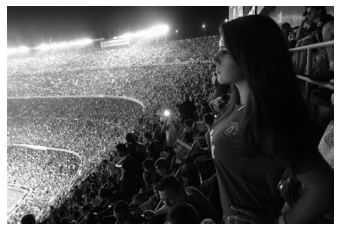

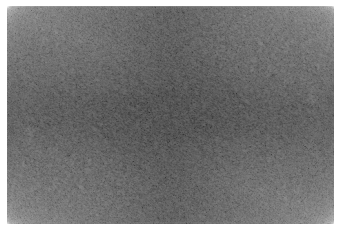

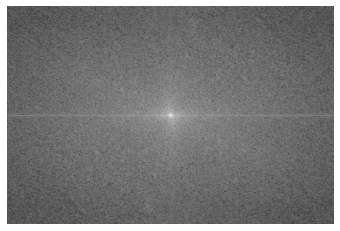

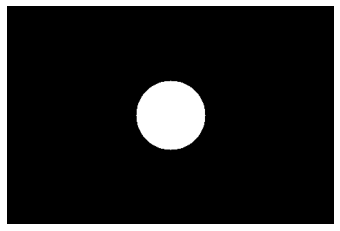

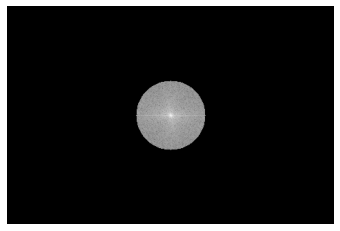

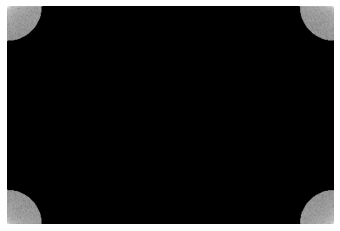

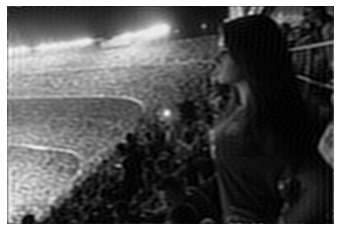

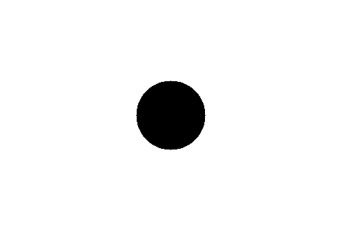

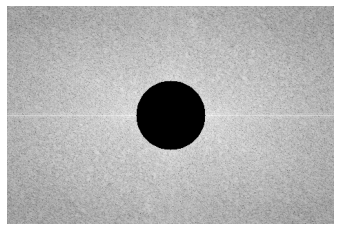

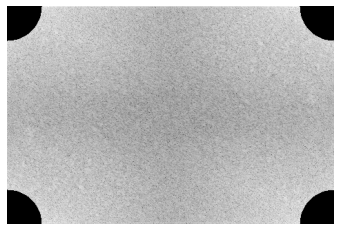

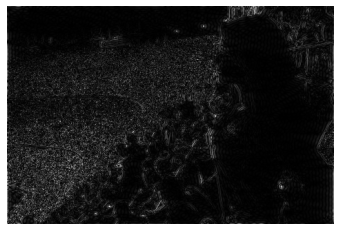

In [ ]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
f = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/pract_3.jpeg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7b947c690>,
 Text(0.5, 1.0, 'Contrast stretched image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

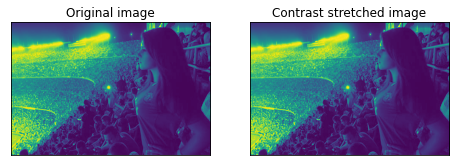

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Read the image
img1 = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/pract_3.jpeg',0)

# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

# Displat the stretched image
plt.figure(figsize=(25, 5), constrained_layout=False)
plt.subplot(161), plt.imshow(img1), plt.title("Original image"), plt.xticks([]), plt.yticks([])
plt.subplot(162), plt.imshow(minmax_img), plt.title("Contrast stretched image"), plt.xticks([]), plt.yticks([])
